# **Walmart Business Case study**

---

Walmart is an American multinational retail corporation that operates a chain of
supercenters, discount departmental stores, and grocery stores in the United States. Walmart has more than 100 million customers worldwide.


In [102]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

1. Import the dataset and do usual data analysis steps like checking the structure &
characteristics of the dataset

In [104]:
# Reading the Walmart csv file and storing it to the variable df
df = pd.read_csv("/content/drive/MyDrive/Scalar/DAV- Python libraries/walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
# Finding the total rows and columns in the walmart csv file
df.shape

(550068, 10)

In [11]:
# Finding the data type of the columns and non-null count as well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
# There is no null values in the data
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [7]:
# Checking the duplicate data
df.duplicated().sum()

# there was no duplicate records in the given walmart data

0

2. Detect Null values and outliers

<Axes: >

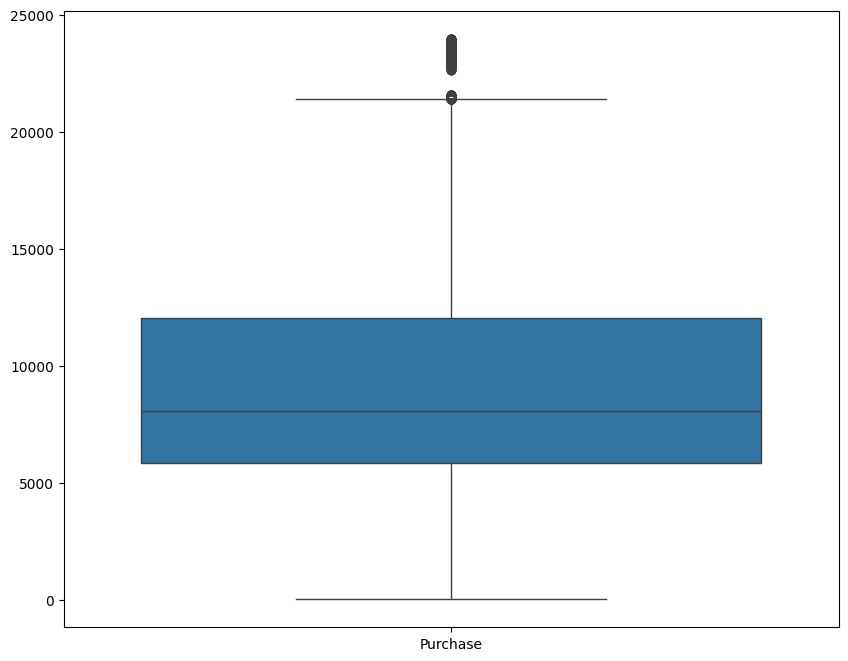

In [8]:
#boxplot before outliers clipping
plt.figure(figsize=(10,8))
sns.boxplot(data=df[['Purchase']])

In [3]:
#Cliping the max and min 5 %
min_5 = np.percentile(df['Purchase'],5)
max_95 = np.percentile(df['Purchase'],95)

df_clip = np.clip(df['Purchase'], min_5, max_95)
df_clip

,Purchase
0,8370
1,15200
2,1984
3,1984
4,7969
...,...
550063,1984
550064,1984
550065,1984
550066,1984


<Axes: ylabel='Purchase'>

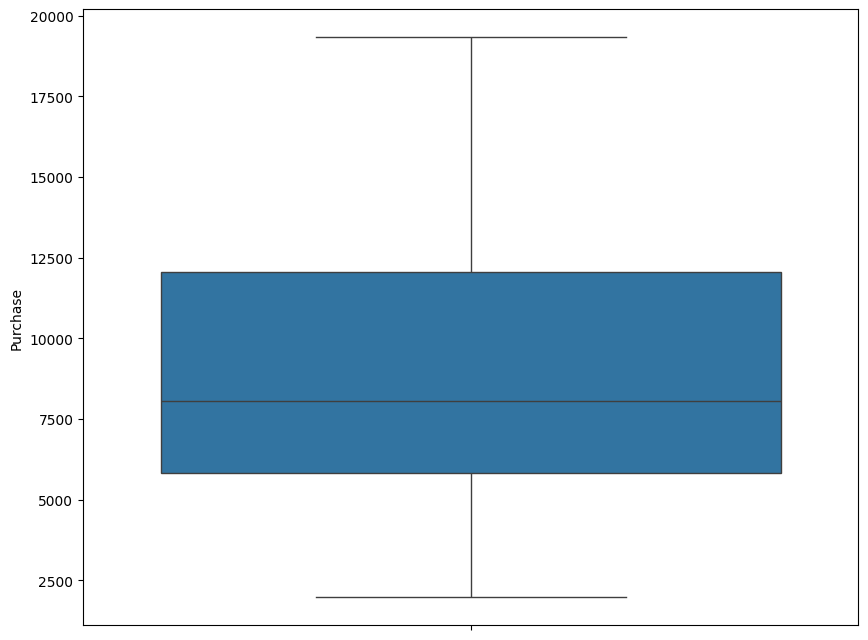

In [9]:
#boxplot after clipping
plt.figure(figsize=(10,8))
sns.boxplot(data=df_clip)


3. Data Exploration

In [11]:
df_Age = df.groupby(['Age','Product_Category'])['Purchase'].sum().unstack()
df_Age

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,48783247,8735846,11317806,1701452,27059712,6377154,821014,17234789,246958,2224273,3558043,177964,82573,512227,2557534,3351633,60863,74703,2271,33121
18-25,362607972,48560733,46495837,5404706,175198782,59116571,7726231,132320061,1079042,11572908,21132943,558864,530639,2922039,14702838,22361393,388536,986425,9913,172242
26-35,783813459,98957188,77805963,9810046,379702493,133712687,26979330,327523339,2413758,34954106,46181222,1449185,1502297,7208556,34455543,60527425,1248285,3166855,20739,338102
36-45,380631904,55878648,39851494,5650797,184577971,61617298,13308854,175386080,1571771,24270193,23589872,1342165,899774,4219327,20878773,29263813,1365016,2070049,11848,184237
46-50,144311800,24163446,14120037,2395813,76279651,25816828,5434726,80267806,487060,10220463,9977768,719394,402618,1954454,8855368,13348682,978178,1016581,5521,87209
51-55,127824120,21196838,9542540,1658375,64326214,23529307,4356259,72591375,422724,10655458,6748072,597719,368453,2180826,8138987,10503288,1127567,1254082,5080,72360
55+,62041252,11023487,4951036,759299,34690406,13980457,2270317,48995349,149011,6939900,2603195,486553,222247,1017267,3379999,5764378,710254,721506,4006,57456


<Figure size 1200x400 with 0 Axes>

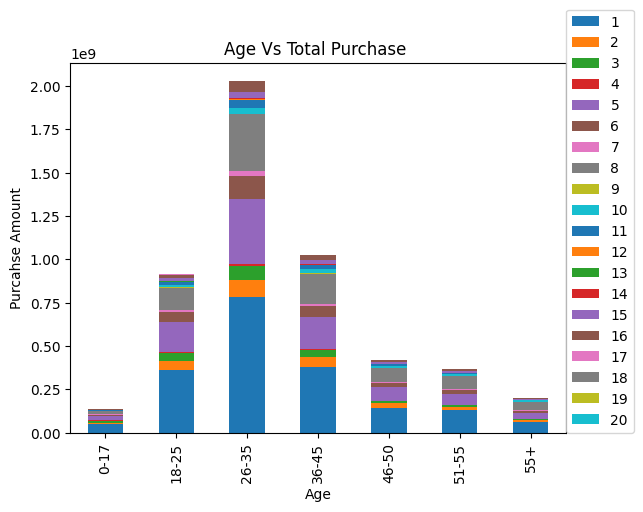

In [12]:
plt.figure(figsize=(12,4))
df_Age.plot(kind='bar', stacked=True)
plt.title("Age Vs Total Purchase ")
plt.legend(loc=(1,0))
plt.ylabel("Purcahse Amount")
plt.show()

# People between the age 26-35 spending more on the purchase followed by 36-45, 18-25.
# people witht the age 0-17(children) are the least contributor

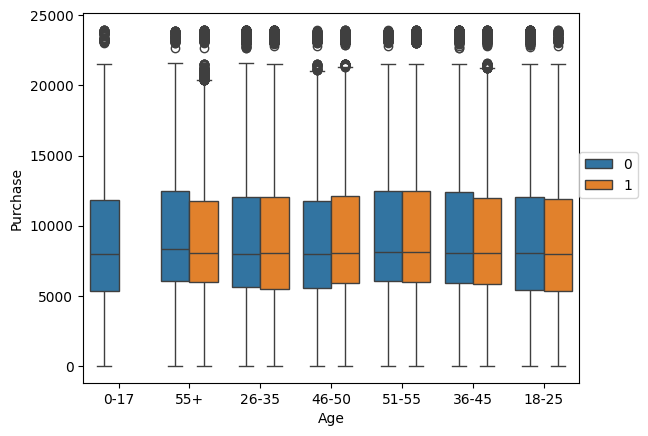

In [44]:
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.legend(loc=(1,0.5))

In [54]:
df_preferred_Product = df.groupby(['Gender','Product_Category'])['Product_ID'].count().unstack()
df_preferred_Product

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,4739,1532,1462,623,1046,2402,62,382,451,723
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,19548,2415,4087,900,5244,7426,516,2743,1152,1827


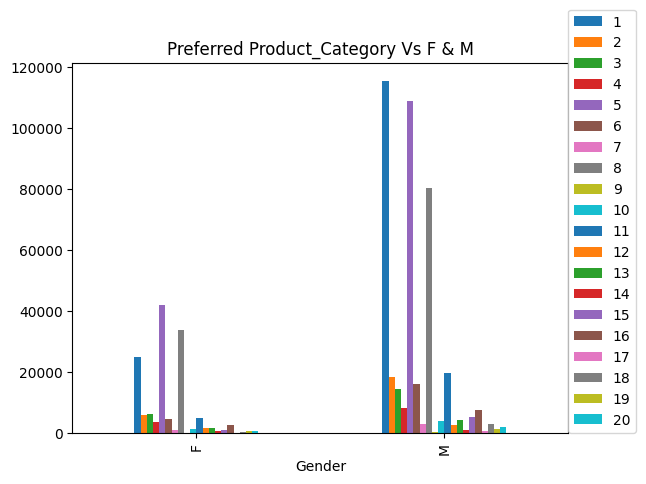

In [56]:
df_preferred_Product.plot(kind='bar', stacked=False)
plt.legend(loc=(1,0))
plt.title('Preferred Product_Category Vs F & M')
plt.show()
# Preferred Product_Category for
#Male -> Product_Category(1)
#Female -> Product_Category(5)

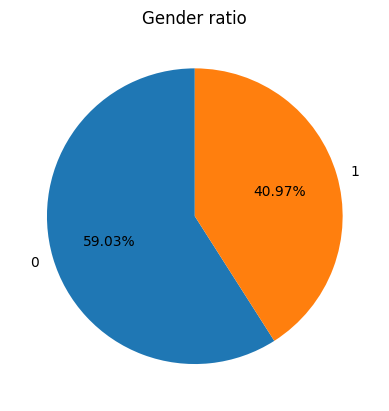

In [89]:
df_Gender_ratio = df['Marital_Status'].value_counts()/df['Marital_Status'].count()
plt.pie(data= df_Gender_ratio, x=df_Gender_ratio, labels=df_Gender_ratio.index, startangle=90, autopct='%.2f%%')
plt.title("Gender ratio")
plt.show()
# Nearly 75% of the customer are Male

4. How does gender affect the amount spent?
Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
intervals for the average amount spent per gender. First, compute the confidence
interval for whatever data is available, and then repeat the same with smaller sample
sizes - 300, 3000, and 30000.

In [7]:
#Calculate the amount spend per user per gender
df_amt =  df.groupby(['User_ID','Gender'])['Purchase'].sum()
df_amt = df_amt.reset_index()
df_amt['Gender'].value_counts()

,count
Gender,
M,4225
F,1666


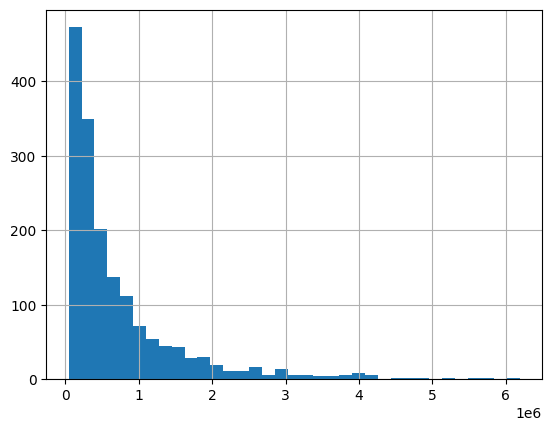

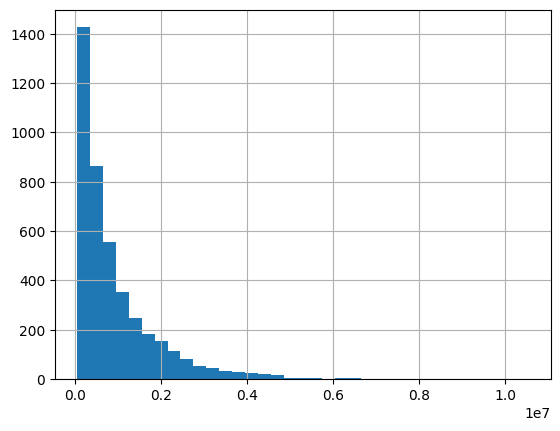

In [21]:
# Display the details in the histogram chart
df_amt[df_amt['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()
df_amt[df_amt['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()

In [8]:
# Filtering/Masking the gender classification
df_Female = df_amt[df_amt['Gender']=='F']
df_Male = df_amt[df_amt['Gender']=='M']


,User_ID,Gender,Purchase
0,1000001,F,334093
5,1000006,F,379930
9,1000010,F,2169510
10,1000011,F,557023
15,1000016,F,150490
...,...,...,...
5885,1006035,F,956645
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034


In [57]:
# Filtering/Masking the purchase of  gender's
#mean value
df_Female_spend = df_amt[df_amt['Gender']=='F']['Purchase'].mean()
df_Male_spend = df_amt[df_amt['Gender']=='M']['Purchase'].mean()

# standard deviation
df_Female_std = df_amt[df_amt['Gender']=='F']['Purchase'].std()
df_Male_std = df_amt[df_amt['Gender']=='M']['Purchase'].std()

print(f'Mean of Female:{df_Female_spend}')
print(f'Mean of Male: {df_Male_spend}')
print(f'Standard deviation of Female:{df_Female_std}')
print(f'Standard deviation of Male: {df_Male_std}')

Mean of Female:712024.3949579832
Mean of Male: 925344.4023668639
Standard deviation of Female:807370.7261464577
Standard deviation of Male: 985830.1007953875


In [71]:
""" 1st with the sample size 300,3000,30000 with repetition of 1000
"""
Female_Samplesize = 30000
Male_Samplesize = 1000
num_repetition = 1000


means_value_Female = []
means_value_Male = []

for _ in range(num_repetition):
  mean_female = df_amt.sample(Female_Samplesize, replace=True)['Purchase'].mean()
  mean_male = df_amt.sample(Male_Samplesize, replace=True)['Purchase'].mean()

  means_value_Female.append(mean_female)
  means_value_Male.append(mean_male)

print(means_value_Female)
print(means_value_Male)


[862403.7239333333, 861947.1123666667, 864847.5536333333, 862139.0185666666, 862736.2821, 869601.6693333334, 863278.7074333334, 870044.7732333334, 866915.0425333333, 860516.1401333333, 860621.1175333334, 859235.1043666666, 875776.2548, 863033.7548333333, 863221.1031666667, 862169.3768333333, 867224.7289666666, 866075.7114666667, 862282.5104666667, 864483.0009333333, 860000.8293666666, 868720.1887333334, 864986.5014333334, 874898.8482, 863413.4816333334, 863755.9498333334, 867954.1652, 857117.5748666667, 858164.0264666667, 863658.4386666666, 861712.2855, 869724.31, 861565.4125666667, 863996.2488, 864527.6044333334, 866453.0273, 865394.0006666667, 856376.762, 875133.1918666667, 867773.1786333333, 856706.8053333333, 863233.8740333334, 864534.0483333333, 862599.0914666667, 868650.6360333334, 873389.6322666666, 861470.8908, 862569.4709666667, 853763.9280333334, 855650.7005333334, 866622.9180333334, 860993.2582333334, 869087.0907, 865209.1165666666, 877339.2798666666, 863031.9722333333, 8718

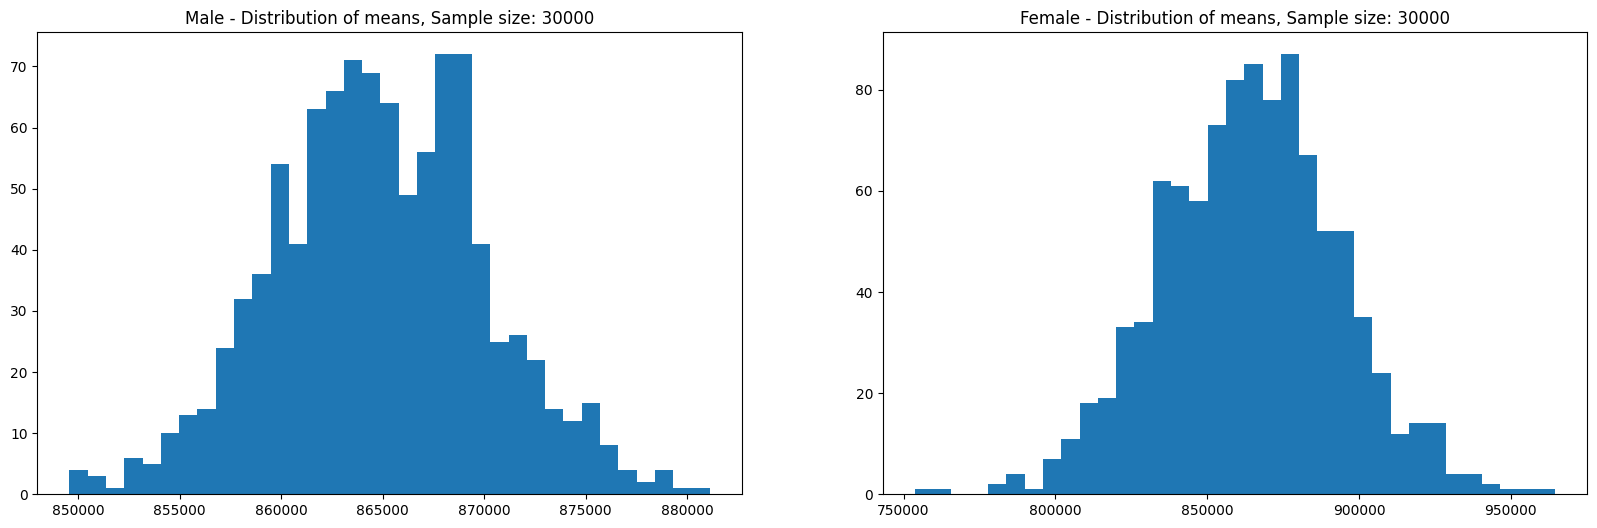

In [70]:
# Distribution of Means witht the sample size of 30000
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(means_value_Female, bins=35)
axis[1].hist(means_value_Male, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 30000")
axis[1].set_title("Female - Distribution of means, Sample size: 30000")

plt.show()

In [66]:
# Calculate Confidence interval with 95%
female_conf_interval = np.percentile(means_value_Female, [2.5 , 97.5])
male_conf_interval = np.percentile(means_value_Male, [2.5 , 97.5])

print(f"95% Confidence Interval for Female Purchase Mean: {female_conf_interval}")
print(f"95% Confidence Interval for Male Purchase Mean: {male_conf_interval}")

# CLT with the sample size(300) -> Female : [765584.35       972897.94566667] | Male :  [759975.51125 977631.4765 ]
# CLT with the sample size(3000) -> Female : [833928.42894167 897962.92541667] | Male :  [833659.73335833 899051.61560833]
# CLT with the sample size(30000) -> Female : [854816.54465167 876003.355325 ] | Male :  [854745.400725   876514.33178333]

95% Confidence Interval for Female Purchase Mean: [854880.42454167 876043.99546417]
95% Confidence Interval for Male Purchase Mean: [807444.40525  926277.320175]


In [67]:
male_margin_of_error_clt = 1.96*df_Male['Purchase'].std()/np.sqrt(len(df_Male))
male_sample_mean = df_Male['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*df_Female['Purchase'].std()/np.sqrt(len(df_Female))
female_sample_mean = df_Female['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

male_CLT = (male_lower_lim, male_upper_lim)
female_CLT = (female_lower_lim, female_upper_lim)

print(f"Male confidence interval of means: {male_CLT}")
print(f"Female confidence interval of means: {female_CLT}")

Male confidence interval of means: (895617.8331736492, 955070.9715600787)
Female confidence interval of means: (673254.7725364959, 750794.0173794704)


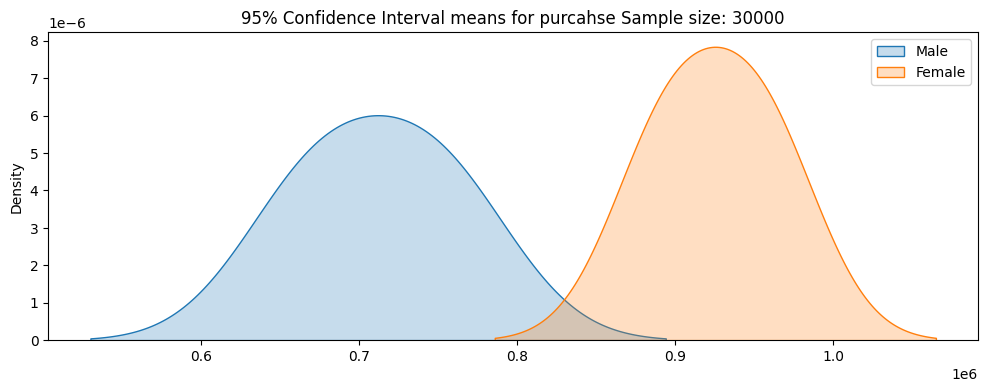

In [76]:
plt.figure(figsize=(12,4))

sns.kdeplot(data=female_CLT,label='Male',fill=True)
sns.kdeplot(data=male_CLT,label='Female',fill=True)
plt.title("95% Confidence Interval means for purcahse Sample size: 30000")
plt.legend(loc='upper right')
plt.show()

Now we can infer about the population that, 95% of the times:

1) Average amount spend by male customer will lie in between: (895617.83, 955070.97)

2) Average amount spend by female customer will lie in between: (673254.77, 750794.02)

5. How does Marital_Status affect the amount spent?
Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
intervals for the average amount spent per Marital_Status. First, compute the
confidence interval for whatever data is available, and then repeat the same with
smaller sample sizes - 300, 3000, and 30000.

Doing the same activity for married vs unmarried:

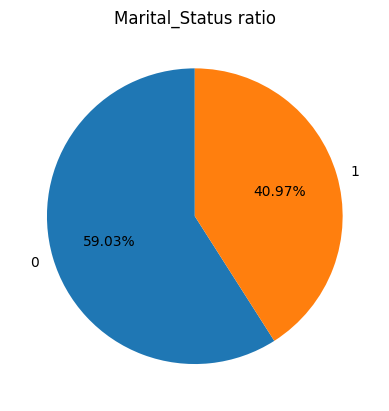

In [105]:
df_Marital_Status_ratio = df['Marital_Status'].value_counts()/df['Marital_Status'].count()
plt.pie(data= df_Marital_Status_ratio, x=df_Marital_Status_ratio, labels=df_Marital_Status_ratio.index, startangle=90, autopct='%.2f%%')
plt.title("Marital_Status ratio")
plt.show()
# Nearly 59.03% of them are unmarried and reamining are marrired

In [106]:
df_amt= df.groupby(['User_ID','Marital_Status'])['Purchase'].sum()
df_amt  = df_amt.reset_index()
df_amt['Marital_Status'].value_counts()


,count
Marital_Status,
0,3417
1,2474


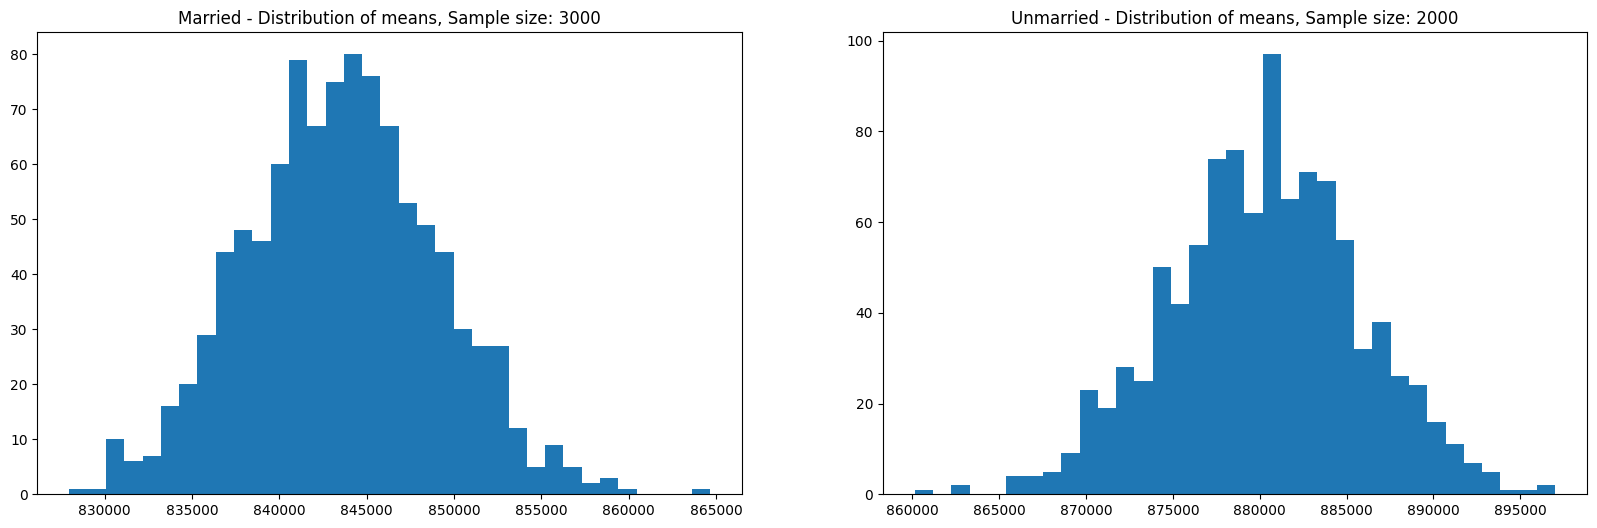

Population mean - Mean of sample means of amount spend for Married: 843596.60
Population mean - Mean of sample means of amount spend for Unmarried: 880245.12

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [107]:
marid_samp_size = 30000
unmarid_sample_size = 30000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = df_amt[df_amt['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = df_amt[df_amt['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(df_amt[df_amt['Marital_Status']==1]['Purchase'].mean(), df_amt[df_amt['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(df_amt[df_amt['Marital_Status']==0]['Purchase'].mean(), df_amt[df_amt['Marital_Status']==0]['Purchase'].std()))

In [108]:
for val in ["Married", "Unmarried"]:
  new_val = 1 if val == "Married" else 0

  new_df = df_amt[df_amt['Marital_Status'] == new_val]

  margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
  sample_mean = new_df['Purchase'].mean()
  lower_lim = sample_mean - margin_of_error_clt
  upper_lim = sample_mean + margin_of_error_clt

print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Unmarried confidence interval of means: (848741.18, 912410.38)


6. How does Age affect the amount spent?

In [111]:
df_amt= df.groupby(['User_ID','Age'])['Purchase'].sum()
df_amt  = df_amt.reset_index()
df_amt['Age'].value_counts()


,count
Age,
26-35,2053
36-45,1167
18-25,1069
46-50,531
51-55,481
55+,372
0-17,218


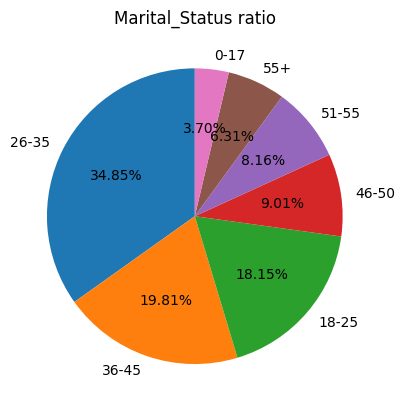

In [119]:
df_age_pie = df_amt['Age'].value_counts()
plt.pie(data= df_age_pie, x=df_age_pie, labels=df_age_pie.index, startangle=90, autopct='%.2f%%')
plt.title("Marital_Status ratio")
plt.show()

In [112]:
sample_size = 30000
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = df_amt[df_amt['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [114]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = df_amt[df_amt['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


**Insights**

7. Create a report

7. Create a report


- **Average amount** spend by **Male** customers: **925344.40**
- **Average amount** spend by **Female** customers: **712024.39**

<br>

#### Confidence Interval by Gender
Now using the **Central Limit Theorem** for the **population**:
1. Average amount spend by **male** customers is **9,26,341.86**
2. Average amount spend by **female** customers is **7,11,704.09**

Now we can infer about the population that, **95% of the times**:

1. Average amount spend by **male** customer will lie in between: **(895617.83, 955070.97)**
2. Average amount spend by **female** customer will lie in between: **(673254.77, 750794.02)**


#### Confidence Interval by Marital_Status
1. **Married** confidence interval of means: **(806668.83, 880384.76)**
2. **Unmarried** confidence interval of means: **(848741.18, 912410.38)**


#### Confidence Interval by Age

1. For **age 26-35** --> confidence interval of means: **(945034.42, 1034284.21)**
2. For **age 36-45** --> confidence interval of means: **(823347.80, 935983.62)**
3. For **age 18-25** --> confidence interval of means: **(801632.78, 908093.46)**
4. For **age 46-50** --> confidence interval of means: **(713505.63, 871591.93)**
5. For **age 51-55** --> confidence interval of means: **(692392.43, 834009.42)**
6. For **age 55+** --> confidence interval of means: **(476948.26, 602446.23)**
7. For **age 0-17** --> confidence interval of means: **(527662.46, 710073.17)**

**Recommendations**




*   Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.


*   Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

*  Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45